In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
ind_df = pd.read_excel('D:/Data/index/000016.SH.xlsx')

In [33]:
ind_df.tail()

,close
2018-03-16,2870.7318
2018-03-19,2897.2558
2018-03-20,2904.3972
2018-03-21,2894.1835
2018-03-22,2866.6702


In [13]:
df = pd.read_excel('D:/option.xlsx', skiprows=6)

In [14]:
df.head()

,日期,期权代码,期权名称,涨跌幅,成交额,前结算价,开盘价,最高价,最低价,收盘价,结算价,成交量,持仓量,涨停价格,跌停价格,Delta,Gamma,Vega,Theta,Rho
0,2018-03-22,10000969,50ETF购3月2.553A,-9.667674,1444191.0,0.3310,0.3283,0.3456,0.2921,0.2990,NaN,454,1006,0.6194,0.0426,NaN,NaN,NaN,NaN,NaN
1,2018-03-22,10000970,50ETF购3月2.602A,-10.390071,1194781.0,0.2820,0.2785,0.2965,0.2437,0.2527,NaN,451,1153,0.5704,0.0001,NaN,NaN,NaN,NaN,NaN
2,2018-03-22,10000971,50ETF购3月2.651A,-12.961373,875703.0,0.2330,0.2302,0.2465,0.1961,0.2028,NaN,396,1130,0.5214,0.0001,NaN,NaN,NaN,NaN,NaN
3,2018-03-22,10000972,50ETF购3月2.70A,-16.250000,1101362.0,0.1840,0.1869,0.1999,0.1475,0.1541,NaN,647,1003,0.4724,0.0001,NaN,NaN,NaN,NaN,NaN
4,2018-03-22,10000973,50ETF购3月2.749A,-20.860686,1105856.0,0.1371,0.1380,0.1518,0.1028,0.1085,NaN,917,1141,0.4255,0.0001,NaN,NaN,NaN,NaN,NaN


In [44]:
put = pd.Series(0, index=df[u'日期'].unique())
call = pd.Series(0, index=df[u'日期'].unique())
for i in df.index:
    date = df.loc[i][u'日期']
    name = df.loc[i][u'期权名称']
    volume = df.loc[i][u'成交量']
    if name.find(u'购') != -1:
        call.loc[date] += volume
    if name.find(u'沽') != -1:
        put.loc[date] += volume

In [45]:
ratio = put / call

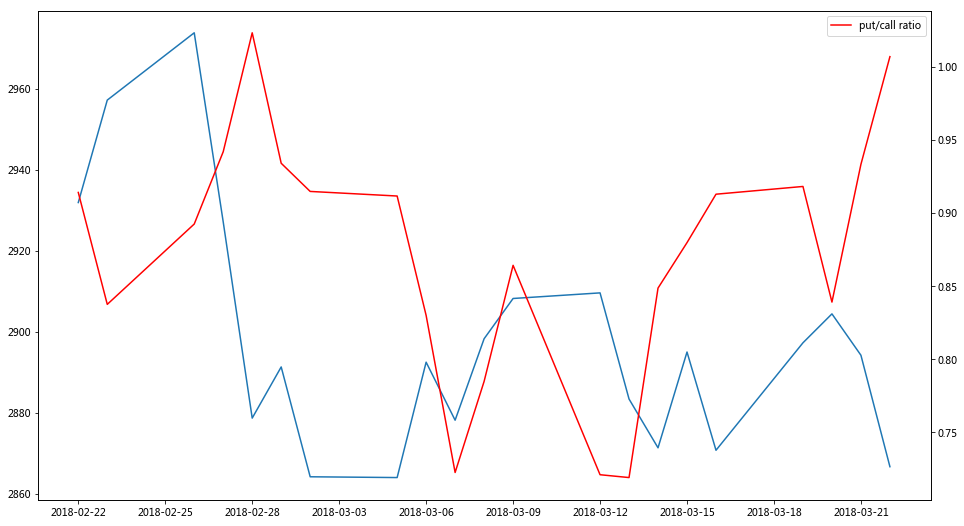

In [46]:
fig, ax1 = plt.subplots(figsize=(16, 9))
ax1.plot(ind_df[ind_df.index >= ratio.index[-1]]['close'])
ax2 = ax1.twinx()
ax2.plot(ratio, color='red', label='put/call ratio')
ax2.legend()

In [39]:
ind_df[ind_df.index >= ratio.index[-1]]['close'].diff()

2018-02-22        NaN
2018-02-23    25.2895
2018-02-26    16.6145
2018-02-27   -46.6887
2018-02-28   -48.4302
2018-03-01    12.6316
2018-03-02   -27.1148
2018-03-05    -0.1934
2018-03-06    28.4852
2018-03-07   -14.3246
2018-03-08    20.1036
2018-03-09     9.9432
2018-03-12     1.3819
2018-03-13   -26.2022
2018-03-14   -12.0431
2018-03-15    23.6488
2018-03-16   -24.2510
2018-03-19    26.5240
2018-03-20     7.1414
2018-03-21   -10.2137
2018-03-22   -27.5133
Name: close, dtype: float64

In [40]:
ratio.diff()

2018-03-22         NaN
2018-03-21    0.078367
2018-03-20    0.120325
2018-03-19   -0.102646
2018-03-16    0.006315
2018-03-15    0.041248
2018-03-14    0.041648
2018-03-13    0.212379
2018-03-12   -0.003742
2018-03-09   -0.229864
2018-03-08    0.117066
2018-03-07    0.109855
2018-03-06   -0.179161
2018-03-05   -0.107937
2018-03-02   -0.003763
2018-03-01   -0.022559
2018-02-28   -0.093362
2018-02-27    0.084411
2018-02-26    0.058829
2018-02-23    0.073512
2018-02-22   -0.099999
dtype: float64

In [2]:
df = pd.read_excel('D:/tmp/totalpc.xlsx', index_col=0)

In [3]:
df.head()

,CALLS,PUTS,TOTAL,P/C Ratio,SPX.GI
DATE,,,,,
11/1/2006,1401036,1271445,2672481,0.91,1367.81
11/2/2006,1348240,1218592,2566832,0.90,1367.34
11/3/2006,1317371,1197794,2515165,0.91,1364.30
11/6/2006,1260832,960752,2221584,0.76,1379.78
11/7/2006,1463685,1158790,2622475,0.79,1382.84


In [4]:
df.index = pd.to_datetime(df.index)

<Container object of 2865 artists>

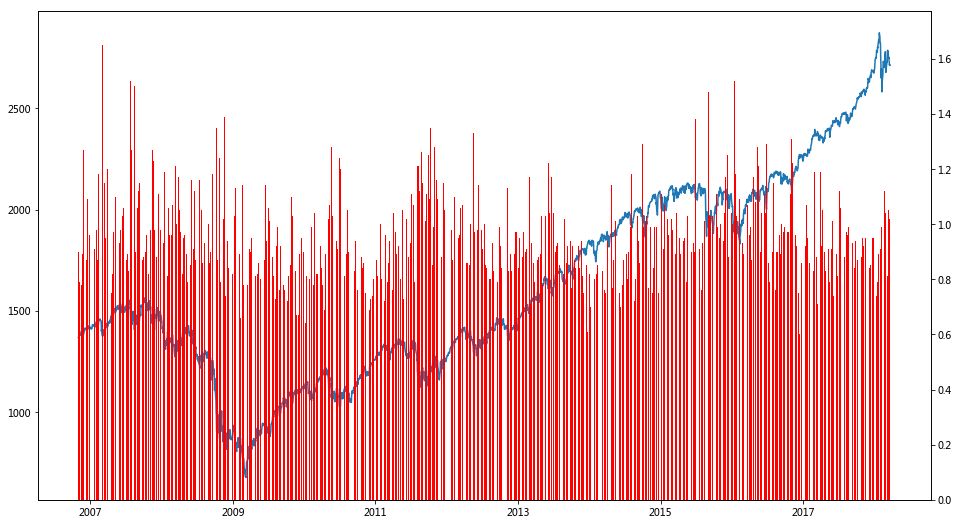

In [10]:
fig, ax1 = plt.subplots(figsize=(16, 9))
ax1.plot(df['SPX.GI'])
ax2 = ax1.twinx()
# ax2.plot(df['P/C Ratio'], color='red', label='put/call ratio')
# ax2.legend()
ax2.bar(df.index, df['P/C Ratio'], color='red')

In [7]:
df

,CALLS,PUTS,TOTAL,P/C Ratio,SPX.GI
DATE,,,,,
2006-11-01,1401036,1271445,2672481,0.91,1367.81
2006-11-02,1348240,1218592,2566832,0.90,1367.34
2006-11-03,1317371,1197794,2515165,0.91,1364.30
2006-11-06,1260832,960752,2221584,0.76,1379.78
2006-11-07,1463685,1158790,2622475,0.79,1382.84
2006-11-08,1587664,1232542,2820206,0.78,1385.72
2006-11-09,1539157,1288147,2827304,0.84,1378.33
2006-11-10,905032,956168,1861200,1.06,1380.90
2006-11-13,1494150,1189949,2684099,0.80,1384.42
